# Lead Scoring Case Study

#### Problem Statement :
An education company named X Education sells online courses to industry professionals. On any given day, many professionals who are interested in the courses land on their website and browse for courses. 

 

The company markets its courses on several websites and search engines like Google. Once these people land on the website, they might browse the courses or fill up a form for the course or watch some videos. When these people fill up a form providing their email address or phone number, they are classified to be a lead. Moreover, the company also gets leads through past referrals. Once these leads are acquired, employees from the sales team start making calls, writing emails, etc. Through this process, some of the leads get converted while most do not. The typical lead conversion rate at X education is around 30%. 

 

Now, although X Education gets a lot of leads, its lead conversion rate is very poor. For example, if, say, they acquire 100 leads in a day, only about 30 of them are converted. To make this process more efficient, the company wishes to identify the most potential leads, also known as ‘Hot Leads’. If they successfully identify this set of leads, the lead conversion rate should go up as the sales team will now be focusing more on communicating with the potential leads rather than making calls to everyone

In [461]:
#Supressing warnings
import warnings
warnings.filterwarnings('ignore')

In [462]:
#Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [463]:
#Reading the data
from IPython.display import display
pd.options.display.max_columns=None  #to view all the columns

df=pd.read_csv('Leads.csv')
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [464]:
df.shape

(9240, 37)

In [465]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [466]:
df.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'How did you hear about X Education',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags', 'Lead Quality',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'City', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [467]:
df.describe(include='all')

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
count,9240,9240.000000,9240,9204,9240,9240,9240.000000,9103.000000,9240.000000,9103.000000,9137,6779,7802,7033,6550,6531,9240,9240,9240,9240,9240,9240,9240,9240,5887,4473,9240,9240,6531,7820,5022,5022,5022.000000,5022.000000,9240,9240,9240
unique,9240,NaN,5,21,2,2,NaN,NaN,NaN,NaN,17,38,19,10,6,3,2,1,2,2,2,2,2,1,26,5,1,1,6,7,3,3,NaN,NaN,1,2,16
top,9f35c084-e1e1-48f9-b50d-191ae6eb0381,NaN,Landing Page Submission,Google,No,No,NaN,NaN,NaN,NaN,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,02.Medium,NaN,NaN,No,No,Modified
freq,1,NaN,4886,2868,8506,9238,NaN,NaN,NaN,NaN,3437,6492,1942,5043,5600,6528,9226,9240,9238,9239,9239,9236,9233,9240,2072,1560,9240,9240,4146,3222,3839,2788,NaN,NaN,9240,6352,3407
mean,NaN,617188.435606,NaN,NaN,NaN,NaN,0.385390,3.445238,487.698268,2.362820,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.306252,16.344883,NaN,NaN,NaN
std,NaN,23405.995698,NaN,NaN,NaN,NaN,0.486714,4.854853,548.021466,2.161418,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.386694,1.811395,NaN,NaN,NaN
min,NaN,579533.000000,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.000000,11.000000,NaN,NaN,NaN
25%,NaN,596484.500000,NaN,NaN,NaN,NaN,0.000000,1.000000,12.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.000000,15.000000,NaN,NaN,NaN
50%,NaN,615479.000000,NaN,NaN,NaN,NaN,0.000000,3.000000,248.000000,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.000000,16.000000,NaN,NaN,NaN
75%,NaN,637387.250000,NaN,NaN,NaN,NaN,1.000000,5.000000,936.000000,3.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.000000,18.000000,NaN,NaN,NaN


There are many zero variance features which will not help us in predicting

Low variance is when one value is present in huge percentage say "Do Not Email" has frequency 8506 for "NO"

### Data Cleaning and Preparation

In [468]:
df.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [469]:
#Droping columns in which null values are more than 3000
for i in df.columns:
    if df[i].isnull().sum()>3000 :
        df.drop(i,1,inplace=True)

In [470]:
df.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [471]:
# percentage of missing values in each column
round((100*(df.isnull().sum())/len(df.index)),2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   15.56
How did you hear about X Education               23.89
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

In [472]:
##Country and City columns are of no use in our analysis
df.drop(["City","Country"],axis=1,inplace=True)

In [473]:
for i in df:
    print(df[i].astype('category').value_counts())
    print('-----------------------------------')

fffb0e5e-9f92-4017-9f42-781a69da4154    1
56453aec-3f7b-4f30-870c-8f966d393100    1
53ac14bd-2bb2-4315-a21c-94562d1b6b2d    1
53aabd84-5dcc-4299-bbe3-62f3764b07b1    1
539ffa32-1be7-4fe1-b04c-faf1bab763cf    1
                                       ..
aa4180a5-84f1-4e67-8d90-0c8403070a59    1
aa405742-17ac-4c65-b19e-ab91c241cc53    1
aa30ebb2-8476-41ce-9258-37cc025110d3    1
aa27a0af-eeab-4007-a770-fa8a93fa53c8    1
000104b9-23e4-4ddc-8caa-8629fe8ad7f4    1
Name: Prospect ID, Length: 9240, dtype: int64
-----------------------------------
660737    1
603303    1
602561    1
602557    1
602540    1
         ..
630422    1
630405    1
630403    1
630390    1
579533    1
Name: Lead Number, Length: 9240, dtype: int64
-----------------------------------
Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: Lead Origin, dtype: int64
-----------------------------------
Google        

##### There are some categorical variables which have attribute called "select" which means that student has not selected for any option for that column,so this is as good as missing values and we will drop the columns which have more  "select" values 

In [474]:
df['How did you hear about X Education'].value_counts()

Select                   5043
Online Search             808
Word Of Mouth             348
Student of SomeSchool     310
Other                     186
Multiple Sources          152
Advertisements             70
Social Media               67
Email                      26
SMS                        23
Name: How did you hear about X Education, dtype: int64

In [475]:
df["Specialization"].value_counts()

Select                               1942
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

In [476]:
df['Lead Profile'].value_counts()

Select                         4146
Potential Lead                 1613
Other Leads                     487
Student of SomeSchool           241
Lateral Student                  24
Dual Specialization Student      20
Name: Lead Profile, dtype: int64

###### We are dropping columns which has huge number of value "Select"

In [477]:
df.drop(["Lead Profile","How did you hear about X Education"], axis=1, inplace=True)

###### We also noticed that there were some columns in which presence of one value was way too much high than other one for all data points.Those columns are "Do Not Email","Do Not Call","Search","Magazine","Newspaper Article","X Education Forums","Newspaper","Digital Advertisement","Through Recommendations","Receive More Updates About Our Courses","Update me on Supply Chain Content","Get updates on DM Content","I agree to pay the amount through cheque"

In [478]:
df.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Specialization', 'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [479]:
df.drop(["Do Not Email","Do Not Call","Search","Magazine","Newspaper Article","X Education Forums","Newspaper","Digital Advertisement","Through Recommendations","Receive More Updates About Our Courses","Update me on Supply Chain Content","Get updates on DM Content","I agree to pay the amount through cheque"],axis=1,inplace=True)


In [480]:
df["What matters most to you in choosing a course"].isnull().sum()

2709

In [481]:
df["What matters most to you in choosing a course"].value_counts()

Better Career Prospects      6528
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

It has 2709 null values and "Better Career Prospects" values,this data will not be good for our model.So we will drop it

In [482]:
df.drop(["What matters most to you in choosing a course"],axis=1,inplace=True)

In [483]:
#Checking null values after dropping columns
df.isnull().sum()

Prospect ID                                  0
Lead Number                                  0
Lead Origin                                  0
Lead Source                                 36
Converted                                    0
TotalVisits                                137
Total Time Spent on Website                  0
Page Views Per Visit                       137
Last Activity                              103
Specialization                            1438
What is your current occupation           2690
A free copy of Mastering The Interview       0
Last Notable Activity                        0
dtype: int64

In [484]:
df=df[~pd.isnull(df["What is your current occupation"])]

In [485]:
df.isnull().sum()

Prospect ID                                 0
Lead Number                                 0
Lead Origin                                 0
Lead Source                                36
Converted                                   0
TotalVisits                               130
Total Time Spent on Website                 0
Page Views Per Visit                      130
Last Activity                             103
Specialization                             18
What is your current occupation             0
A free copy of Mastering The Interview      0
Last Notable Activity                       0
dtype: int64

In [486]:
df=df[~pd.isnull(df["TotalVisits"])]

In [487]:
df.isnull().sum()

Prospect ID                                0
Lead Number                                0
Lead Origin                                0
Lead Source                               29
Converted                                  0
TotalVisits                                0
Total Time Spent on Website                0
Page Views Per Visit                       0
Last Activity                              0
Specialization                            18
What is your current occupation            0
A free copy of Mastering The Interview     0
Last Notable Activity                      0
dtype: int64

In [488]:
df=df[~pd.isnull(df["Lead Source"])]

In [489]:
df.isnull().sum()

Prospect ID                                0
Lead Number                                0
Lead Origin                                0
Lead Source                                0
Converted                                  0
TotalVisits                                0
Total Time Spent on Website                0
Page Views Per Visit                       0
Last Activity                              0
Specialization                            18
What is your current occupation            0
A free copy of Mastering The Interview     0
Last Notable Activity                      0
dtype: int64

In [490]:
df=df[~pd.isnull(df["Specialization"])]

In [491]:
df.isnull().sum()

Prospect ID                               0
Lead Number                               0
Lead Origin                               0
Lead Source                               0
Converted                                 0
TotalVisits                               0
Total Time Spent on Website               0
Page Views Per Visit                      0
Last Activity                             0
Specialization                            0
What is your current occupation           0
A free copy of Mastering The Interview    0
Last Notable Activity                     0
dtype: int64

In [492]:
df.shape

(6373, 13)

In [493]:
round((len(df.index)/9240),2)

0.69

In [494]:
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,0,0.0,0,0.0,Page Visited on Website,Select,Unemployed,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,0,5.0,674,2.5,Email Opened,Select,Unemployed,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,1,2.0,1428,1.0,Converted to Lead,Select,Unemployed,No,Modified


In [495]:
#Prospect ID and Lead number are not usefull for analysis
df.drop(['Prospect ID','Lead Number'],axis=1,inplace=True)

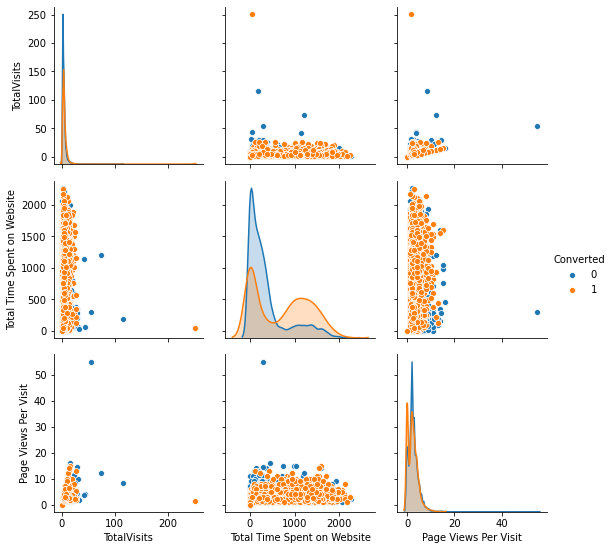

In [496]:
sns.pairplot(df,diag_kind='kde',hue='Converted')

In [497]:
Z=df[["TotalVisits","Total Time Spent on Website","Page Views Per Visit","Converted"]]

In [498]:
from sklearn.preprocessing import PowerTransformer
pt= PowerTransformer()
transformed=pd.DataFrame(pt.fit_transform(Z))
transformed.columns=Z.columns
transformed.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Converted
0,-1.539988,-1.532509,-1.534722,-0.962570
1,0.690854,0.641870,0.230818,-0.962570
2,-0.219742,1.262512,-0.019004,1.038885
3,-0.723932,0.153656,-0.629842,-0.962570
4,-0.219742,1.204175,-0.629842,1.038885


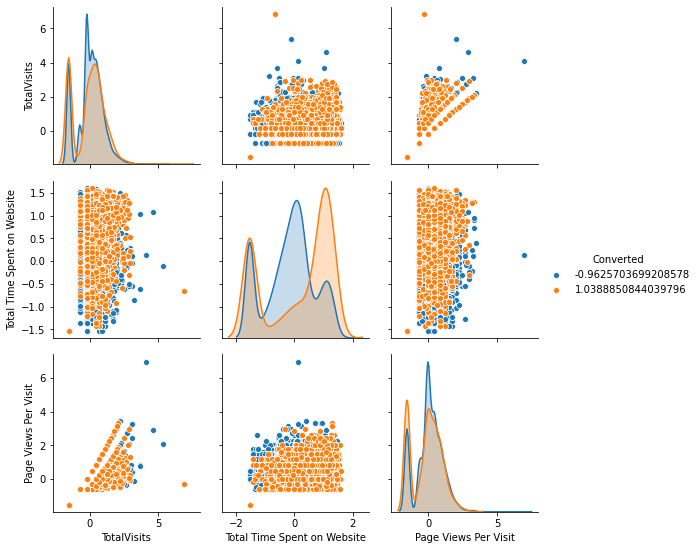

In [499]:
sns.pairplot(transformed,diag_kind='kde',hue='Converted')

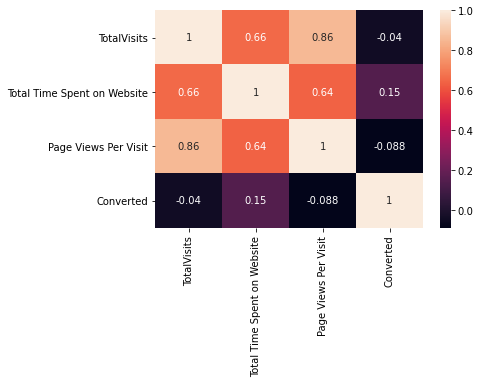

In [500]:
sns.heatmap(transformed.corr(),annot=True)

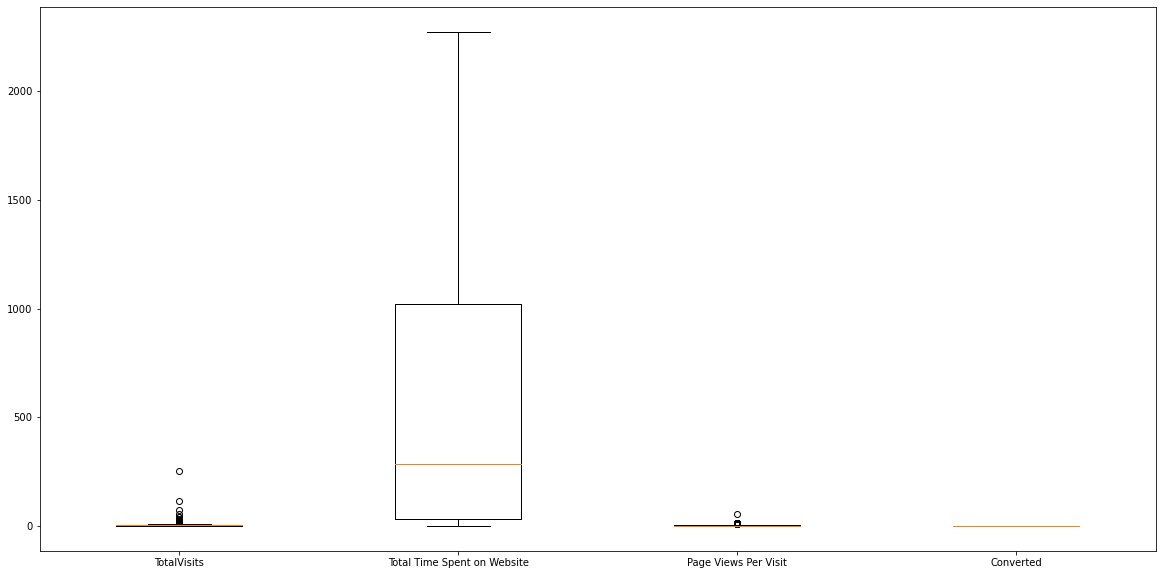

In [501]:
df1=[df.TotalVisits,df["Total Time Spent on Website"],df["Page Views Per Visit"],df.Converted]
name= ["TotalVisits","Total Time Spent on Website","Page Views Per Visit","Converted"]
plt.figure(figsize=(20,10))
plt.boxplot(df1,labels=name)
plt.show()

There are are no outliers,TotalVisits have one but that doesnt seem to an outlier

#### Dummy variable creation

In [502]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6373 entries, 0 to 9239
Data columns (total 11 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             6373 non-null   object 
 1   Lead Source                             6373 non-null   object 
 2   Converted                               6373 non-null   int64  
 3   TotalVisits                             6373 non-null   float64
 4   Total Time Spent on Website             6373 non-null   int64  
 5   Page Views Per Visit                    6373 non-null   float64
 6   Last Activity                           6373 non-null   object 
 7   Specialization                          6373 non-null   object 
 8   What is your current occupation         6373 non-null   object 
 9   A free copy of Mastering The Interview  6373 non-null   object 
 10  Last Notable Activity                   6373 non-null   obje

In [503]:
#Checking columns which have datatype object
X=df.loc[:,df.dtypes=='object']
X.columns

Index(['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization',
       'What is your current occupation',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [504]:
Y=['Lead Origin', 'Lead Source', 'Last Activity','What is your current occupation','A free copy of Mastering The Interview', 'Last Notable Activity']

In [505]:
dummy_1=pd.get_dummies(df[Y],drop_first=True)


In [506]:
df=pd.concat([df,dummy_1],axis=1)

In [507]:
df.shape

(6373, 63)

In [508]:
##Since Specialization has "select" values,we will created dummy variables separately and drop dummies
dummy2= pd.get_dummies(df["Specialization"],prefix='Specialization')
dummy2=dummy2.drop(["Specialization_Select"],1)
df=pd.concat([df,dummy2],axis=1)

In [509]:
#Dropping the variables for which we have created dummy variables
df=df.drop(Y,1)

In [510]:
df.shape

(6373, 75)

In [511]:
df=df.drop(["Specialization"],1)

In [512]:
df.head()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_testone,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,A free copy of Mastering The Interview_Yes,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism
0,0,0.0,0,0.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,5.0,674,2.5,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,2.0,1532,2.0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,1.0,305,1.0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,1,2.0,1428,1.0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


#### Test Train Split

We will split the dataset into training and testing sets


In [513]:
from sklearn.model_selection import train_test_split

In [514]:
#Putting all the feature variables in x
x=df.drop(["Converted"],1)
x.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_testone,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,A free copy of Mastering The Interview_Yes,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism
0,0.0,0,0.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,5.0,674,2.5,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2.0,1532,2.0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1.0,305,1.0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,2.0,1428,1.0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [515]:
#Putting target valiable in y
y=df["Converted"]
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [516]:
#Splitting data into 70%training and 30% testing data
X_train,X_test,y_train,y_test = train_test_split(x,y,train_size=0.7,test_size=0.3,random_state=100)

In [517]:
X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_testone,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,A free copy of Mastering The Interview_Yes,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism
8003,4.0,67,2.0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
218,4.0,187,4.0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4171,6.0,78,6.0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4037,0.0,0,0.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3660,0.0,0,0.0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


### Scaling the data

In [518]:

from sklearn.preprocessing import StandardScaler


In [519]:
scaler = StandardScaler()

X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_testone,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,A free copy of Mastering The Interview_Yes,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism
8003,0.064874,-0.824395,-0.223652,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
218,0.064874,-0.611929,0.753710,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4171,0.431907,-0.804919,1.731071,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4037,-0.669191,-0.943022,-1.201013,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3660,-0.669191,-0.943022,-1.201013,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


### Checking correlations

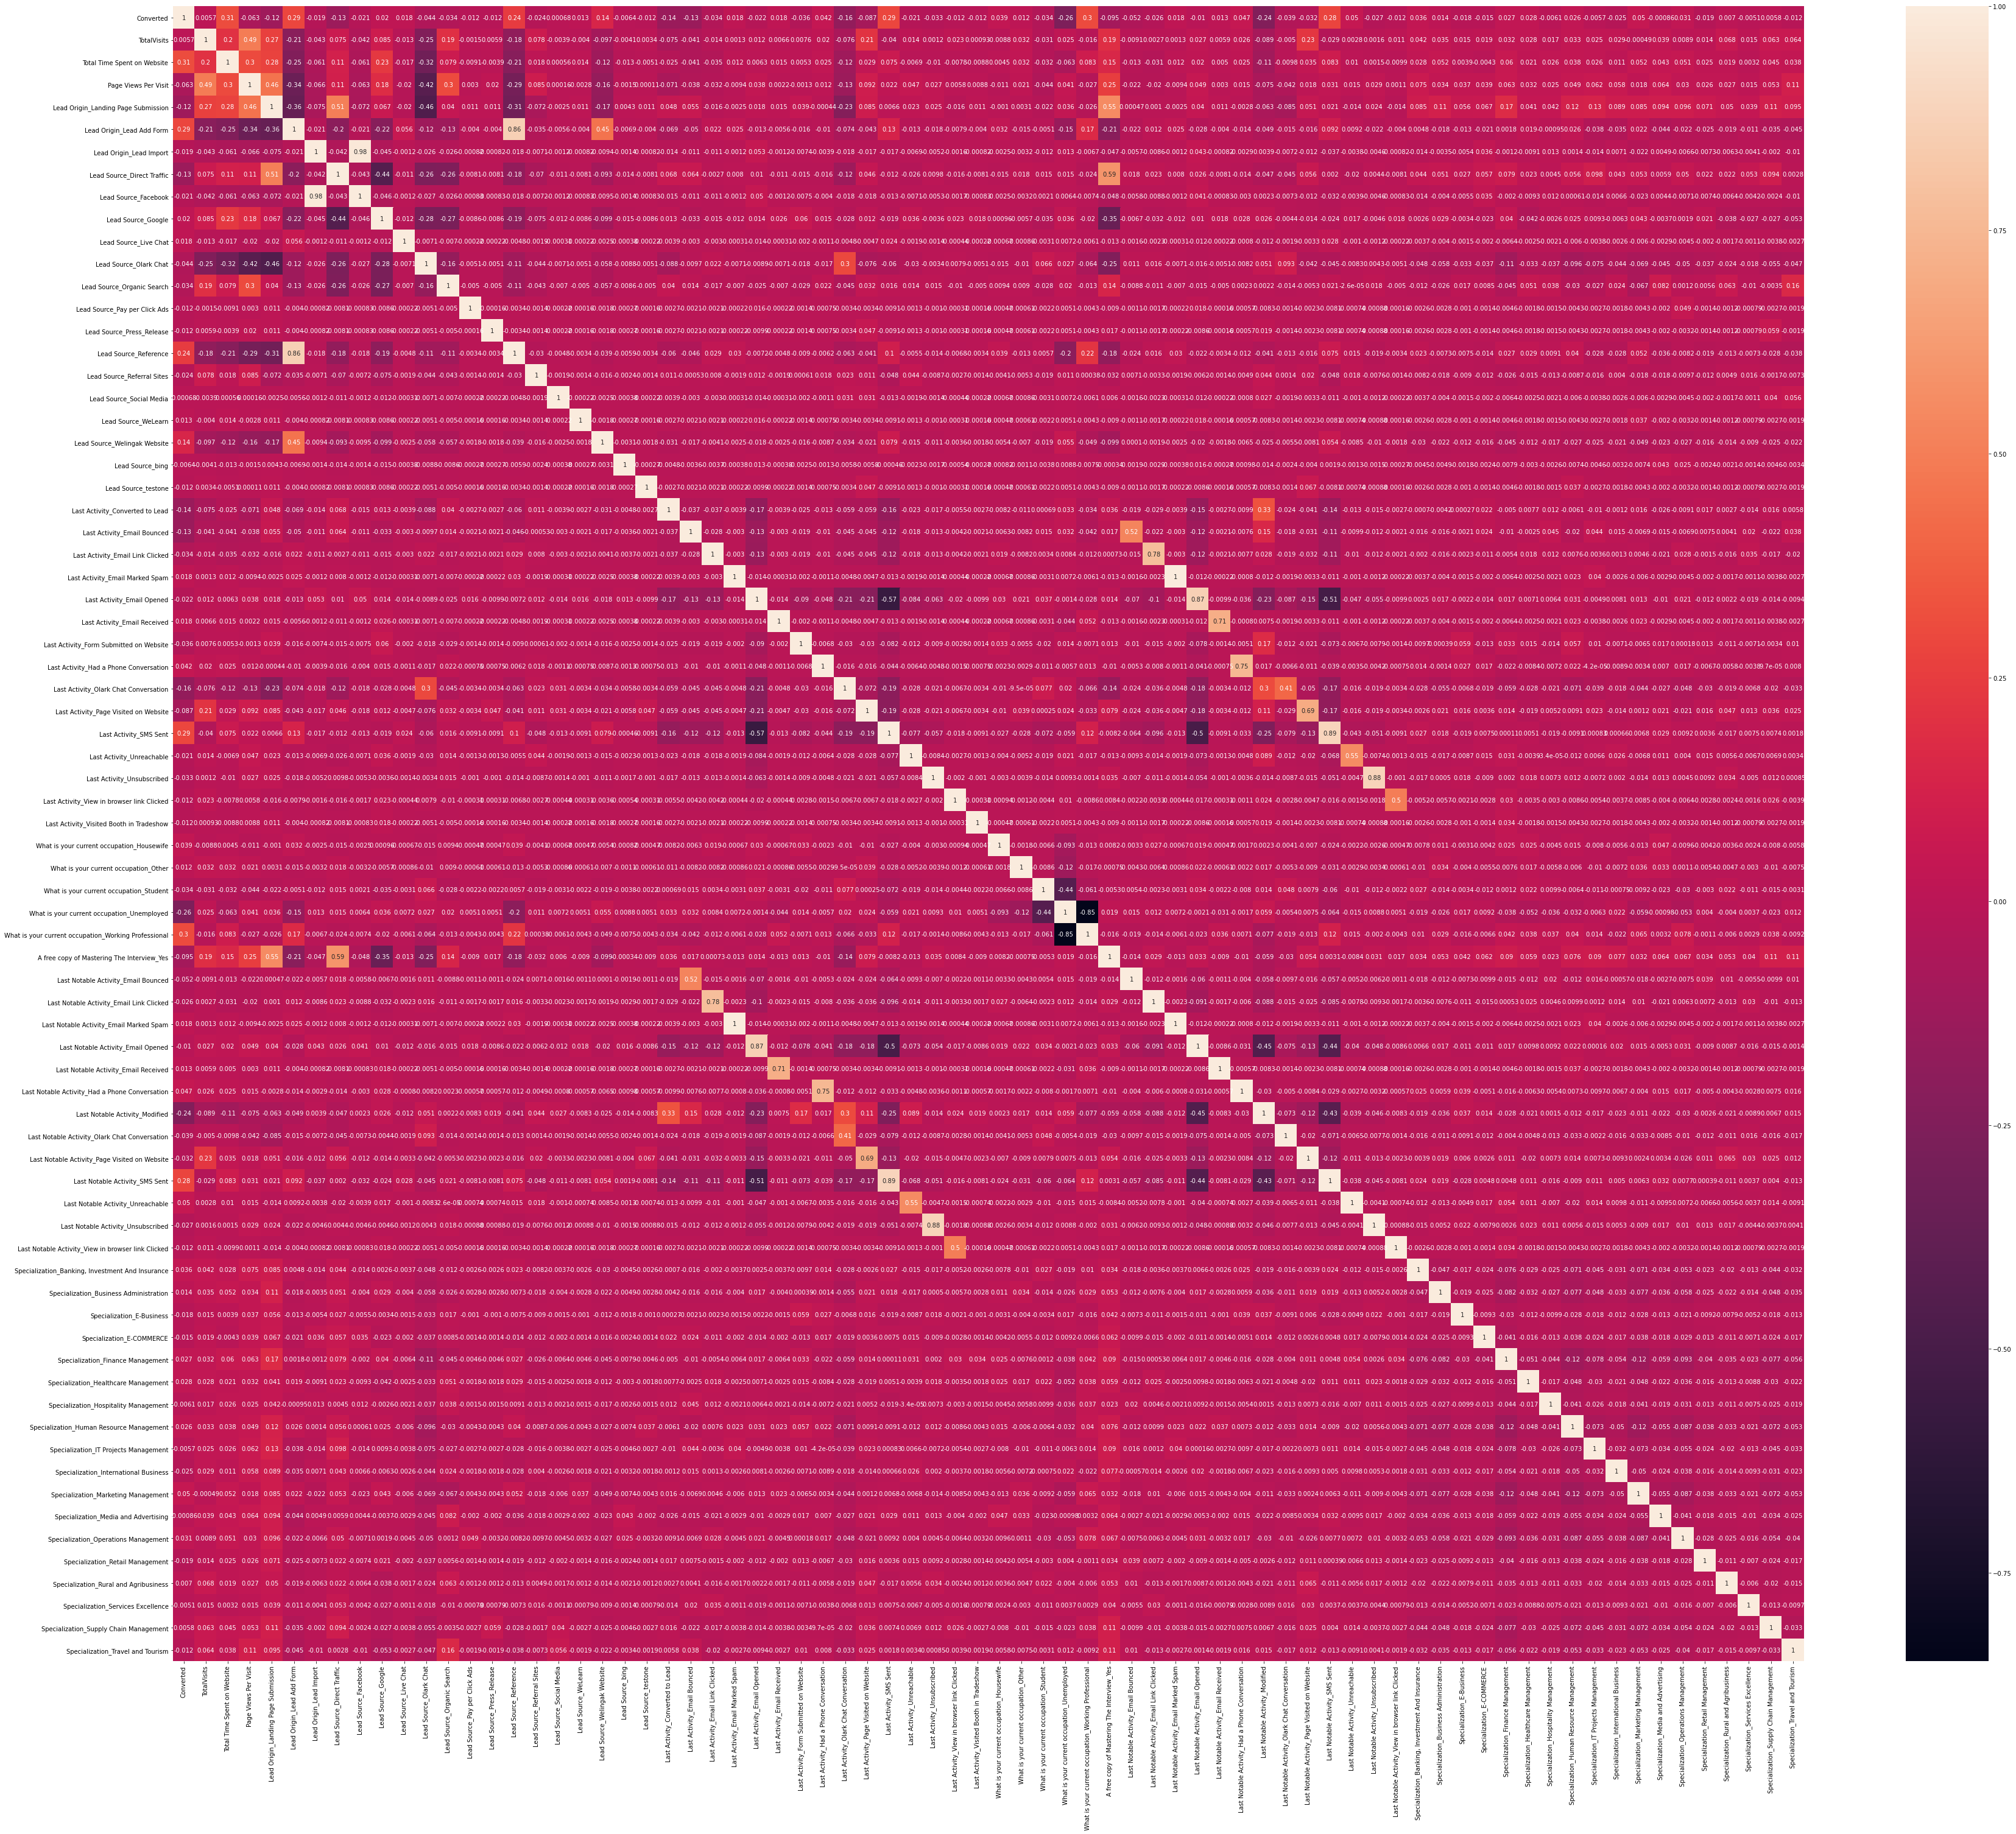

In [520]:
plt.figure(figsize = (60,50))
sns.heatmap(df.corr(),annot = True)
plt.show()

### Model Building

In [521]:
from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression()

In [522]:
#Importing RFE for feature selection
from sklearn.feature_selection import RFE
rfe= RFE(logreg,15)  #Selecting 15 variables
rfe = rfe.fit(X_train,y_train)

In [523]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', False, 38),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 39),
 ('Lead Origin_Landing Page Submission', False, 6),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 54),
 ('Lead Source_Direct Traffic', False, 18),
 ('Lead Source_Facebook', False, 53),
 ('Lead Source_Google', False, 26),
 ('Lead Source_Live Chat', False, 40),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 25),
 ('Lead Source_Pay per Click Ads', False, 41),
 ('Lead Source_Press_Release', False, 44),
 ('Lead Source_Reference', True, 1),
 ('Lead Source_Referral Sites', False, 27),
 ('Lead Source_Social Media', False, 58),
 ('Lead Source_WeLearn', False, 35),
 ('Lead Source_Welingak Website', True, 1),
 ('Lead Source_bing', False, 24),
 ('Lead Source_testone', False, 42),
 ('Last Activity_Converted to Lead', False, 32),
 ('Last Activity_Email Bounced', True, 1),
 ('Last Activity_Email Link Clicked', False, 52),
 ('Last Ac

In [524]:
#Putting all the selected columns in col
col = X_train.columns[rfe.support_]

In [525]:
X_train=X_train[col]


In [526]:
X_train.head()

,Total Time Spent on Website,Lead Origin_Lead Add Form,Lead Source_Olark Chat,Lead Source_Reference,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Had a Phone Conversation,Last Activity_SMS Sent,What is your current occupation_Housewife,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Unreachable
8003,-0.824395,0,0,0,0,0,0,1,0,0,1,0,0,0,0
218,-0.611929,0,0,0,0,0,0,0,0,0,1,0,0,1,0
4171,-0.804919,0,0,0,0,0,0,0,0,0,1,0,0,1,0
4037,-0.943022,0,1,0,0,0,0,0,0,0,1,0,0,0,0
3660,-0.943022,1,0,1,0,0,0,1,0,0,1,0,0,0,0


In [527]:
#Assessing the model with StatsModels
import statsmodels.api as sm
X_train_sm = sm.add_constant(X_train[col])
logm1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4461
Model:                            GLM   Df Residuals:                     4445
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2058.9
Date:                Sun, 22 Nov 2020   Deviance:                       4117.8
Time:                        23:56:16   Pearson chi2:                 4.71e+03
No. Iterations:                    22                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.5642      0.610      0.925      0.355      -0.631       1.759
Total Time Spent on Website                              1.1017      0.046     23.922      0.000       1.011       1.192
Lead Origin_Lead Add Form                                2.8625      1.214      2.358      0.018       0.483       5.242
Lead Source_Olark Chat                                   1.3270      0.114     11.649      0.000       1.104       1.550
Lead Source_Reference                                    1.2058      1.238      0.974      0.330      -1.220       3.632
Lead Source_Welingak Website                             3.1768      1.576      2.016      0.044       0.088       6.265
Last Activity_Email Bounced                             -1.5446      0.371     -4.166      0.000      -2.271      -0.818
Last Activity_Had a Phone Conversation                   1.6467      0.985      1.671      0.095      -0.284       3.578
Last Activity_SMS Sent                                   0.9253      0.084     11.069      0.000       0.761       1.089
What is your current occupation_Housewife               22.4995   2.39e+04      0.001      0.999   -4.68e+04    4.69e+04
What is your current occupation_Student                 -1.2574      0.646     -1.946      0.052      -2.524       0.009
What is your current occupation_Unemployed              -1.4006      0.611     -2.292      0.022      -2.598      -0.203
What is your current occupation_Working Professional     1.2158      0.640      1.900      0.057      -0.038       2.470
Last Notable Activity_Had a Phone Conversation          22.4941   2.07e+04      0.001      0.999   -4.06e+04    4.07e+04
Last Notable Activity_Modified                          -0.8304      0.090     -9.269      0.000      -1.006      -0.655
Last Notable Activity_Unreachable                        2.5073      0.807      3.106      0.002       0.925       4.089
========================================================================================================================
"""

In [528]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

8003    0.305902
218     0.087785
4171    0.072185
4037    0.366266
3660    0.957639
207     0.118423
2044    0.121096
6411    0.918559
6498    0.045898
2085    0.984692
dtype: float64

In [529]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred = y_train_pred * 100
y_train_pred[:10]

array([30.59022262,  8.77849608,  7.21854422, 36.62663025, 95.76391549,
       11.84234929, 12.10964576, 91.8559479 ,  4.58978479, 98.46924947])

Creating a dataframe with the actual churn flag and the predicted probabilities

In [530]:
y_train_pred_final = pd.DataFrame({'Conversion':y_train.values, 'Conversion_Prob':y_train_pred})
y_train_pred_final['LeadID'] = y_train.index
y_train_pred_final.head()

,Conversion,Conversion_Prob,LeadID
0,0,30.590223,8003
1,0,8.778496,218
2,1,7.218544,4171
3,1,36.626630,4037
4,1,95.763915,3660


Creating new column 'predicted' with 1 if Conversion_Prob > 0.5 else 0

In [531]:
y_train_pred_final['predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 50 else 0)

# Let's see the head
y_train_pred_final.head()

,Conversion,Conversion_Prob,LeadID,predicted
0,0,30.590223,8003,0
1,0,8.778496,218,0
2,1,7.218544,4171,0
3,1,36.626630,4037,0
4,1,95.763915,3660,1


In [533]:
from sklearn import metrics

In [534]:
confusion = metrics.confusion_matrix(y_train_pred_final.Conversion, y_train_pred_final.predicted )
print(confusion)

[[1931  381]
 [ 568 1581]]


In [536]:
##Accuracy of the model
print(metrics.accuracy_score(y_train_pred_final.Conversion, y_train_pred_final.predicted))

0.7872674288276171


In [537]:
#Checking multicollinearity using variance inflation factor
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [538]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,Lead Origin_Lead Add Form,84.15
3,Lead Source_Reference,65.19
4,Lead Source_Welingak Website,20.03
6,Last Activity_Had a Phone Conversation,2.45
12,Last Notable Activity_Had a Phone Conversation,2.44
10,What is your current occupation_Unemployed,2.40
7,Last Activity_SMS Sent,1.69
13,Last Notable Activity_Modified,1.58
2,Lead Source_Olark Chat,1.36
11,What is your current occupation_Working Profes...,1.31


In [539]:
col = col.drop('Lead Origin_Lead Add Form', 1)
col

Index(['Total Time Spent on Website', 'Lead Source_Olark Chat',
       'Lead Source_Reference', 'Lead Source_Welingak Website',
       'Last Activity_Email Bounced', 'Last Activity_Had a Phone Conversation',
       'Last Activity_SMS Sent', 'What is your current occupation_Housewife',
       'What is your current occupation_Student',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional',
       'Last Notable Activity_Had a Phone Conversation',
       'Last Notable Activity_Modified', 'Last Notable Activity_Unreachable'],
      dtype='object')

In [540]:
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4461
Model:                            GLM   Df Residuals:                     4446
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2062.3
Date:                Mon, 23 Nov 2020   Deviance:                       4124.6
Time:                        00:09:15   Pearson chi2:                 4.71e+03
No. Iterations:                    22                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.5652      0.609      0.928      0.354      -0.629       1.759
Total Time Spent on Website                              1.0967      0.046     23.892      0.000       1.007       1.187
Lead Source_Olark Chat                                   1.3184      0.114     11.601      0.000       1.096       1.541
Lead Source_Reference                                    4.0580      0.261     15.548      0.000       3.546       4.570
Lead Source_Welingak Website                             6.0287      1.009      5.973      0.000       4.050       8.007
Last Activity_Email Bounced                             -1.5465      0.370     -4.174      0.000      -2.273      -0.820
Last Activity_Had a Phone Conversation                   1.6424      0.984      1.668      0.095      -0.287       3.572
Last Activity_SMS Sent                                   0.9269      0.084     11.099      0.000       0.763       1.091
What is your current occupation_Housewife               22.4987   2.39e+04      0.001      0.999   -4.68e+04    4.69e+04
What is your current occupation_Student                 -1.2563      0.646     -1.946      0.052      -2.522       0.009
What is your current occupation_Unemployed              -1.3965      0.611     -2.287      0.022      -2.593      -0.200
What is your current occupation_Working Professional     1.2148      0.639      1.900      0.057      -0.038       2.468
Last Notable Activity_Had a Phone Conversation          22.4917   2.08e+04      0.001      0.999   -4.07e+04    4.07e+04
Last Notable Activity_Modified                          -0.8294      0.089     -9.267      0.000      -1.005      -0.654
Last Notable Activity_Unreachable                        2.5010      0.807      3.100      0.002       0.920       4.083
========================================================================================================================
"""

In [541]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
5,Last Activity_Had a Phone Conversation,2.45
11,Last Notable Activity_Had a Phone Conversation,2.44
9,What is your current occupation_Unemployed,2.40
6,Last Activity_SMS Sent,1.69
12,Last Notable Activity_Modified,1.58
1,Lead Source_Olark Chat,1.36
10,What is your current occupation_Working Profes...,1.31
2,Lead Source_Reference,1.28
0,Total Time Spent on Website,1.27
3,Lead Source_Welingak Website,1.07


In [542]:
#drop column having high p value 'What is your current occupation_Housewife'
col = col.drop('What is your current occupation_Housewife', 1)

In [543]:
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4461
Model:                            GLM   Df Residuals:                     4447
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2064.4
Date:                Mon, 23 Nov 2020   Deviance:                       4128.8
Time:                        00:09:54   Pearson chi2:                 4.71e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    1.1237      0.557      2.018      0.044       0.032       2.215
Total Time Spent on Website                              1.0965      0.046     23.891      0.000       1.007       1.186
Lead Source_Olark Chat                                   1.3170      0.114     11.588      0.000       1.094       1.540
Lead Source_Reference                                    4.0577      0.261     15.550      0.000       3.546       4.569
Lead Source_Welingak Website                             6.0282      1.009      5.972      0.000       4.050       8.006
Last Activity_Email Bounced                             -1.5468      0.370     -4.175      0.000      -2.273      -0.821
Last Activity_Had a Phone Conversation                   1.6409      0.984      1.667      0.096      -0.288       3.570
Last Activity_SMS Sent                                   0.9272      0.084     11.103      0.000       0.764       1.091
What is your current occupation_Student                 -1.8150      0.597     -3.042      0.002      -2.984      -0.646
What is your current occupation_Unemployed              -1.9553      0.558     -3.502      0.000      -3.050      -0.861
What is your current occupation_Working Professional     0.6557      0.589      1.112      0.266      -0.500       1.811
Last Notable Activity_Had a Phone Conversation          21.4934   1.26e+04      0.002      0.999   -2.47e+04    2.47e+04
Last Notable Activity_Modified                          -0.8275      0.089     -9.255      0.000      -1.003      -0.652
Last Notable Activity_Unreachable                        2.4997      0.807      3.097      0.002       0.918       4.082
========================================================================================================================
"""

In [544]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
5,Last Activity_Had a Phone Conversation,2.45
10,Last Notable Activity_Had a Phone Conversation,2.44
8,What is your current occupation_Unemployed,2.40
6,Last Activity_SMS Sent,1.69
11,Last Notable Activity_Modified,1.58
1,Lead Source_Olark Chat,1.36
9,What is your current occupation_Working Profes...,1.31
2,Lead Source_Reference,1.28
0,Total Time Spent on Website,1.27
3,Lead Source_Welingak Website,1.07


In [545]:
#drop column havign high p value (here 'Last Notable Activity_Had a Phone Conversation')
col = col.drop('Last Notable Activity_Had a Phone Conversation', 1)

In [546]:
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4461
Model:                            GLM   Df Residuals:                     4448
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2066.4
Date:                Mon, 23 Nov 2020   Deviance:                       4132.9
Time:                        00:12:42   Pearson chi2:                 4.72e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    1.1270      0.557      2.024      0.043       0.036       2.218
Total Time Spent on Website                              1.0951      0.046     23.870      0.000       1.005       1.185
Lead Source_Olark Chat                                   1.3158      0.114     11.578      0.000       1.093       1.539
Lead Source_Reference                                    4.0574      0.261     15.546      0.000       3.546       4.569
Lead Source_Welingak Website                             6.0268      1.009      5.971      0.000       4.049       8.005
Last Activity_Email Bounced                             -1.5446      0.370     -4.169      0.000      -2.271      -0.819
Last Activity_Had a Phone Conversation                   2.9178      0.799      3.653      0.000       1.352       4.483
Last Activity_SMS Sent                                   0.9254      0.083     11.085      0.000       0.762       1.089
What is your current occupation_Student                 -1.8154      0.597     -3.043      0.002      -2.985      -0.646
What is your current occupation_Unemployed              -1.9553      0.558     -3.502      0.000      -3.050      -0.861
What is your current occupation_Working Professional     0.6544      0.589      1.110      0.267      -0.501       1.810
Last Notable Activity_Modified                          -0.8363      0.089     -9.363      0.000      -1.011      -0.661
Last Notable Activity_Unreachable                        2.4960      0.807      3.093      0.002       0.914       4.078
========================================================================================================================
"""

In [547]:
y_train_pred = res.predict(X_train_sm).values.reshape(-1)

In [548]:
y_train_pred[:10]

array([0.30880781, 0.08828399, 0.07268818, 0.36697793, 0.95778246,
       0.11886568, 0.12153112, 0.91756852, 0.04584097, 0.9847192 ])

In [550]:
y_train_pred_final = pd.DataFrame({'Conversion':y_train.values, 'Conversion_Prob':y_train_pred})
y_train_pred_final['LeadID'] = y_train.index
y_train_pred_final.head()

,Conversion,Conversion_Prob,LeadID
0,0,0.308808,8003
1,0,0.088284,218
2,1,0.072688,4171
3,1,0.366978,4037
4,1,0.957782,3660


In [551]:
y_train_pred_final['predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Conversion,Conversion_Prob,LeadID,predicted
0,0,0.308808,8003,0
1,0,0.088284,218,0
2,1,0.072688,4171,0
3,1,0.366978,4037,0
4,1,0.957782,3660,1


In [552]:
confusion = metrics.confusion_matrix(y_train_pred_final.Conversion, y_train_pred_final.predicted )
print(confusion)

[[1929  383]
 [ 569 1580]]


In [553]:
print(metrics.accuracy_score(y_train_pred_final.Conversion, y_train_pred_final.predicted))

0.7865949338713293


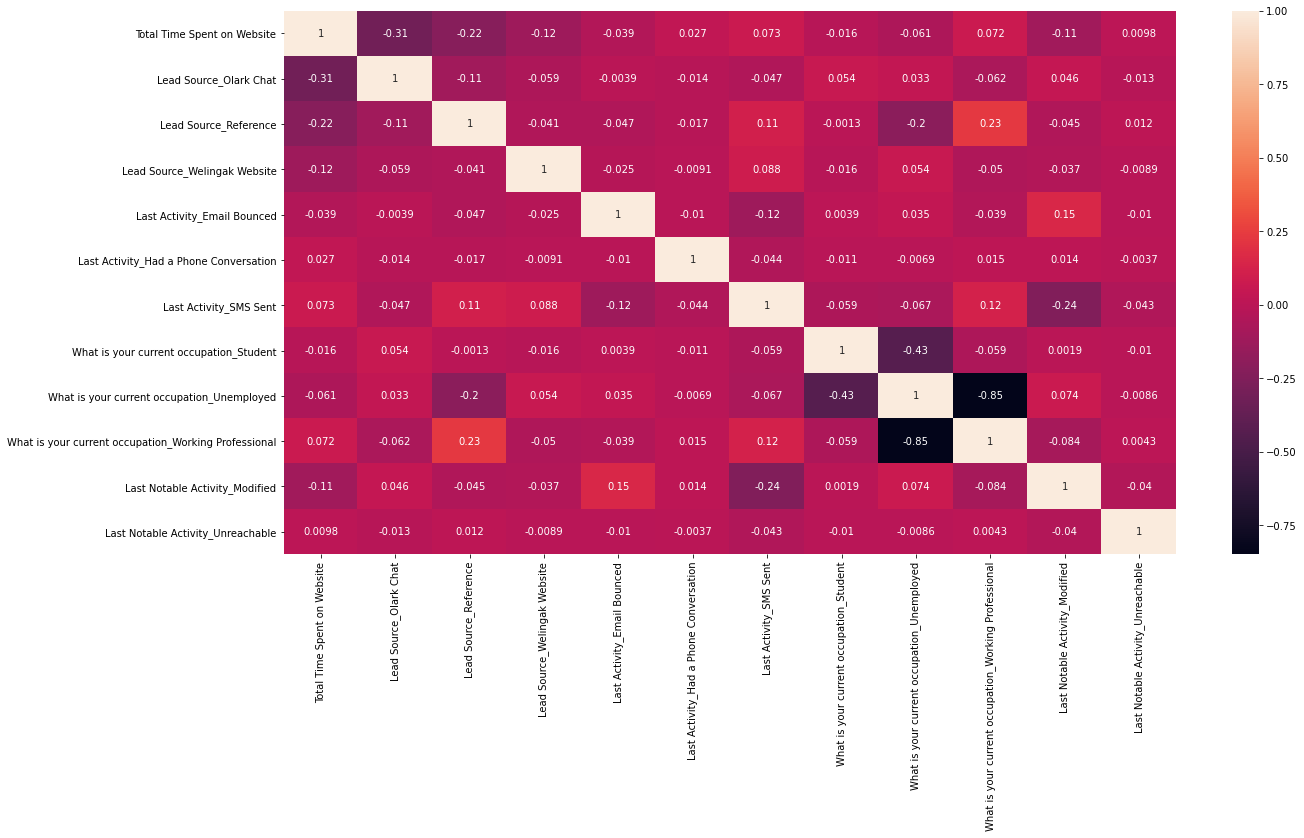

In [554]:
plt.figure(figsize = (20,10))        # Size of the figure
sns.heatmap(X_train[col].corr(),annot = True)
plt.show()

# Metrics beyond simply accuracy

In [555]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [556]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.7352256863657515

In [557]:
# Let us calculate specificity
TN / float(TN+FP)

0.8343425605536332

In [558]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.1656574394463668


In [559]:
# positive predictive value 
print (TP / float(TP+FP))

0.804890473764646


In [560]:
# Negative predictive value
print (TN / float(TN+ FN))

0.7722177742193755


# Plotting the ROC Curve

An ROC curve demonstrates several things: •It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity). •The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test. •The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

In [561]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [562]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Conversion, y_train_pred_final.Conversion_Prob, drop_intermediate = False )

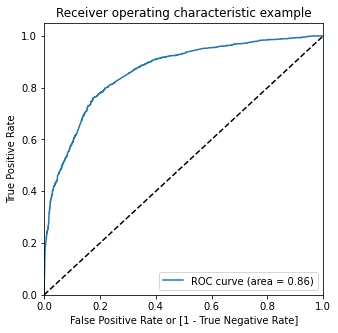

In [563]:
draw_roc(y_train_pred_final.Conversion, y_train_pred_final.Conversion_Prob)

## Finding Optimal Cutoff Point


Optimal cutoff probability is that prob where we get balanced sensitivity and specificity

In [564]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Conversion,Conversion_Prob,LeadID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.308808,8003,0,1,1,1,1,0,0,0,0,0,0
1,0,0.088284,218,0,1,0,0,0,0,0,0,0,0,0
2,1,0.072688,4171,0,1,0,0,0,0,0,0,0,0,0
3,1,0.366978,4037,0,1,1,1,1,0,0,0,0,0,0
4,1,0.957782,3660,1,1,1,1,1,1,1,1,1,1,1


In [565]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Conversion, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.481731  1.000000  0.000000
0.1   0.1  0.566017  0.986040  0.175606
0.2   0.2  0.682582  0.951140  0.432958
0.3   0.3  0.758798  0.893904  0.633218
0.4   0.4  0.788612  0.799907  0.778114
0.5   0.5  0.786595  0.735226  0.834343
0.6   0.6  0.757902  0.624477  0.881920
0.7   0.7  0.737503  0.544439  0.916955
0.8   0.8  0.707241  0.441135  0.954585
0.9   0.9  0.645371  0.281061  0.983997


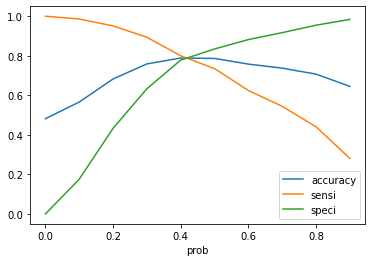

In [567]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()


In [568]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map( lambda x: 1 if x > 0.42 else 0)

y_train_pred_final.head()

,Conversion,Conversion_Prob,LeadID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.308808,8003,0,1,1,1,1,0,0,0,0,0,0,0
1,0,0.088284,218,0,1,0,0,0,0,0,0,0,0,0,0
2,1,0.072688,4171,0,1,0,0,0,0,0,0,0,0,0,0
3,1,0.366978,4037,0,1,1,1,1,0,0,0,0,0,0,0
4,1,0.957782,3660,1,1,1,1,1,1,1,1,1,1,1,1


In [569]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Conversion, y_train_pred_final.final_predicted)

0.7895090786819099

In [570]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Conversion, y_train_pred_final.final_predicted)
confusion2

array([[1840,  472],
       [ 467, 1682]], dtype=int64)

In [571]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [574]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.7826896230805026

In [573]:
# Let us calculate specificity
TN / float(TN+FP)

0.7958477508650519

In [575]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.2041522491349481


In [576]:
# Positive predictive value 
print (TP / float(TP+FP))

0.7808727948003714


In [577]:
# Negative predictive value
print (TN / float(TN+ FN))

0.7975726051148678


### Precision and Recall

In [580]:
from sklearn.metrics import precision_score, recall_score

In [581]:
#Precision
precision_score(y_train_pred_final.Conversion, y_train_pred_final.predicted)

0.804890473764646

In [582]:
#Recall
recall_score(y_train_pred_final.Conversion, y_train_pred_final.predicted)

0.7352256863657515

### Precision and Recall Tradeoff

In [583]:
from sklearn.metrics import precision_recall_curve

In [584]:
y_train_pred_final.Conversion, y_train_pred_final.predicted

(0       0
 1       0
 2       1
 3       1
 4       1
        ..
 4456    1
 4457    0
 4458    0
 4459    0
 4460    0
 Name: Conversion, Length: 4461, dtype: int64,
 0       0
 1       0
 2       0
 3       0
 4       1
        ..
 4456    1
 4457    1
 4458    1
 4459    0
 4460    0
 Name: predicted, Length: 4461, dtype: int64)

In [585]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Conversion, y_train_pred_final.Conversion_Prob)

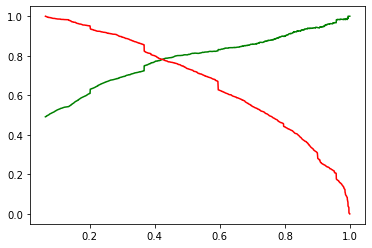

In [586]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

# Making predictions on the test set

In [587]:
X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.transform(X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])
X_test.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_testone,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,A free copy of Mastering The Interview_Yes,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism
4771,-0.669191,-0.943022,-1.201013,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
6122,0.615423,-0.826165,2.219752,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
9202,0.064874,0.733689,0.753710,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
6570,-0.118642,0.581422,0.265029,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2668,0.798939,0.646932,0.753710,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [588]:
X_test = X_test[col]
X_test.head()

,Total Time Spent on Website,Lead Source_Olark Chat,Lead Source_Reference,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Had a Phone Conversation,Last Activity_SMS Sent,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Last Notable Activity_Modified,Last Notable Activity_Unreachable
4771,-0.943022,0,1,0,0,0,1,0,0,1,0,0
6122,-0.826165,0,0,0,0,0,0,0,1,0,0,0
9202,0.733689,0,0,0,0,0,1,0,1,0,0,0
6570,0.581422,0,0,0,0,0,1,0,1,0,0,0
2668,0.646932,0,0,0,0,0,1,0,1,0,1,0


In [589]:
#Adding constant
X_test_sm = sm.add_constant(X_test)

In [590]:
#Making prediction
y_test_pred = res.predict(X_test_sm)

In [591]:
y_test_pred[:10]

4771    0.996769
6122    0.150195
9202    0.711061
6570    0.675638
2668    0.492309
4233    0.952121
3368    0.776449
9091    0.482634
5972    0.162985
3631    0.784520
dtype: float64

In [592]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [593]:
# Let's see the head
y_pred_1.head()

,0
4771,0.996769
6122,0.150195
9202,0.711061
6570,0.675638
2668,0.492309


In [594]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [595]:
# Putting CustID to index
y_test_df['LeadID'] = y_test_df.index

In [596]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [597]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [598]:
y_pred_final.head()

,Converted,LeadID,0
0,1,4771,0.996769
1,0,6122,0.150195
2,0,9202,0.711061
3,1,6570,0.675638
4,1,2668,0.492309


In [599]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Conversion_Prob'})

In [601]:
# Rearranging the columns
y_pred_final.head()

,Converted,LeadID,Conversion_Prob
0,1,4771,0.996769
1,0,6122,0.150195
2,0,9202,0.711061
3,1,6570,0.675638
4,1,2668,0.492309


In [602]:
y_pred_final.shape

(1912, 3)

In [603]:
y_pred_final['final_predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.42 else 0)


In [604]:
y_pred_final.head()

,Converted,LeadID,Conversion_Prob,final_predicted
0,1,4771,0.996769,1
1,0,6122,0.150195,0
2,0,9202,0.711061,1
3,1,6570,0.675638,1
4,1,2668,0.492309,1


In [605]:
# Let's check the overall accuracy.
accuracy_score=metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)
accuracy_score

0.7866108786610879

In [606]:
confusion_test = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
print(confusion_test)

[[788 208]
 [200 716]]


In [607]:
TP = confusion_test[1,1] # true positive 
TN = confusion_test[0,0] # true negatives
FP = confusion_test[0,1] # false positives
FN = confusion_test[1,0] # false negatives

In [608]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.7816593886462883

In [609]:
# Let us calculate specificity
TN / float(TN+FP)

0.7911646586345381

In [610]:
# Calculate false postive rate - predicting converion when customer does not have converted
print(FP/ float(TN+FP))

0.20883534136546184


In [611]:
# Positive predictive value 
print (TP / float(TP+FP))

0.7748917748917749


In [612]:
# Negative predictive value
print (TN / float(TN+ FN))

0.7975708502024291


In [613]:
#precision
confusion_test[1,1]/(confusion_test[0,1]+confusion_test[1,1])

0.7748917748917749

In [614]:
#recall
confusion_test[1,1]/(confusion_test[1,0]+confusion_test[1,1])

0.7816593886462883

In [615]:
from sklearn.metrics import precision_recall_curve

In [616]:
y_pred_final.Converted, y_pred_final.final_predicted

(0       1
 1       0
 2       0
 3       1
 4       1
        ..
 1907    0
 1908    1
 1909    0
 1910    1
 1911    1
 Name: Converted, Length: 1912, dtype: int64,
 0       1
 1       0
 2       1
 3       1
 4       1
        ..
 1907    0
 1908    1
 1909    1
 1910    1
 1911    1
 Name: final_predicted, Length: 1912, dtype: int64)

In [617]:
p, r, thresholds = precision_recall_curve(y_pred_final.Converted, y_pred_final.Conversion_Prob)

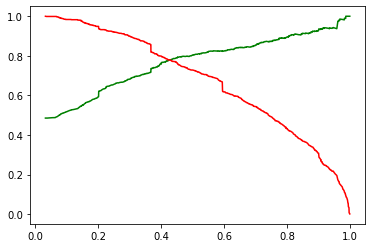

In [618]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

# Plotting the ROC Curve 

In [619]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return fpr,tpr, thresholds

In [620]:
fpr, tpr, thresholds = metrics.roc_curve( y_pred_final.Converted, y_pred_final.Conversion_Prob, drop_intermediate = False )

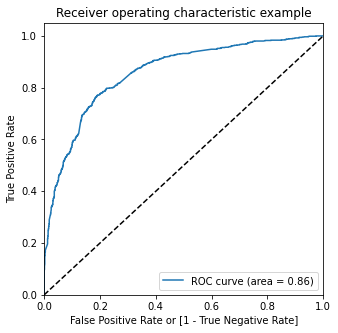

(array([0.        , 0.        , 0.        , ..., 0.99799197, 0.99899598,
        1.        ]),
 array([0.        , 0.0010917 , 0.00218341, ..., 1.        , 1.        ,
        1.        ]),
 array([1.99901319, 0.99901319, 0.99884805, ..., 0.01577587, 0.01524303,
        0.01464375]))

In [621]:
draw_roc(y_pred_final.Converted, y_pred_final.Conversion_Prob)

In [622]:
#lead score for customer in the range 0-100
y_test_pred = y_test_pred * 100
y_test_pred[:10]

4771    99.676850
6122    15.019455
9202    71.106112
6570    67.563790
2668    49.230920
4233    95.212135
3368    77.644910
9091    48.263449
5972    16.298494
3631    78.451989
dtype: float64

In [623]:
#Selecting the coefficients of the selected features from our final model excluding the intercept
pd.options.display.float_format = '{:.2f}'.format
new_params = res.params[1:]
new_params

Total Time Spent on Website                             1.10
Lead Source_Olark Chat                                  1.32
Lead Source_Reference                                   4.06
Lead Source_Welingak Website                            6.03
Last Activity_Email Bounced                            -1.54
Last Activity_Had a Phone Conversation                  2.92
Last Activity_SMS Sent                                  0.93
What is your current occupation_Student                -1.82
What is your current occupation_Unemployed             -1.96
What is your current occupation_Working Professional    0.65
Last Notable Activity_Modified                         -0.84
Last Notable Activity_Unreachable                       2.50
dtype: float64

In [624]:
#Getting a relative coeffient value for all the features wrt the feature with the highest coefficient
feature_importance = new_params
feature_importance = 100.0 * (feature_importance / feature_importance.max())
feature_importance

Total Time Spent on Website                             18.17
Lead Source_Olark Chat                                  21.83
Lead Source_Reference                                   67.32
Lead Source_Welingak Website                           100.00
Last Activity_Email Bounced                            -25.63
Last Activity_Had a Phone Conversation                  48.41
Last Activity_SMS Sent                                  15.36
What is your current occupation_Student                -30.12
What is your current occupation_Unemployed             -32.44
What is your current occupation_Working Professional    10.86
Last Notable Activity_Modified                         -13.88
Last Notable Activity_Unreachable                       41.42
dtype: float64

In [625]:
#Sorting the feature variables based on their relative coefficient values
sorted_idx = np.argsort(feature_importance,kind='quicksort',order='list of str')
sorted_idx

Total Time Spent on Website                              8
Lead Source_Olark Chat                                   7
Lead Source_Reference                                    4
Lead Source_Welingak Website                            10
Last Activity_Email Bounced                              9
Last Activity_Had a Phone Conversation                   6
Last Activity_SMS Sent                                   0
What is your current occupation_Student                  1
What is your current occupation_Unemployed              11
What is your current occupation_Working Professional     5
Last Notable Activity_Modified                           2
Last Notable Activity_Unreachable                        3
dtype: int64

<Figure size 864x576 with 0 Axes>

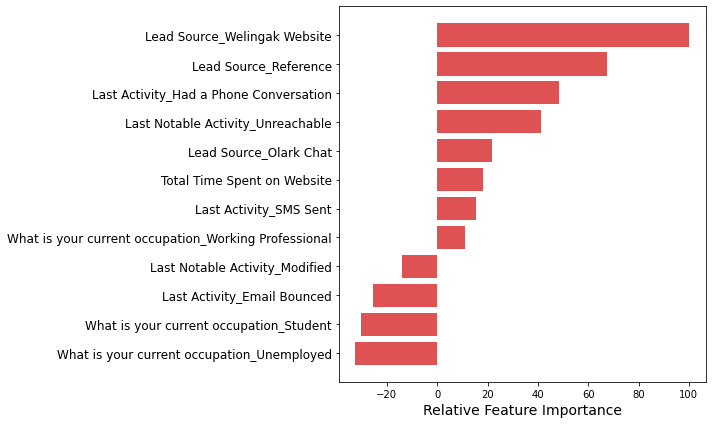

In [626]:
#Plot showing the feature variables based on their relative coefficient values
#Plotting the scree plot
%matplotlib inline
fig = plt.figure(figsize = (12,8))
pos = np.arange(sorted_idx.shape[0]) + .5

featfig = plt.figure(figsize=(10,6))
featax = featfig.add_subplot(1, 1, 1)
featax.barh(pos, feature_importance[sorted_idx], align='center', color = 'tab:red',alpha=0.8)
featax.set_yticks(pos)
featax.set_yticklabels(np.array(X_train[col].columns)[sorted_idx], fontsize=12)
featax.set_xlabel('Relative Feature Importance', fontsize=14)

plt.tight_layout()   
plt.show()
fig.savefig('Question1.png')

## Conclusion
1. Our Logistic Regression Model is decent and accurate enough, when compared to the model derived using PCA.
2. X Education Company needs to focus on following key aspects to improve the overall conversion rate:
        a. Increase user engagement on their website since this helps in higher conversion
        b. Increase on sending SMS notifications since this helps in higher conversion
        c. Get TotalVisits increased by advertising etc. since this helps in higher conversion
        d. Improve the Olark Chat service since this is affecting the conversion negatively